##Implementasi Model Random Forest dan SHAP Values untuk Analisis Fitur Penting Pada Dataset Ames Housing
###**Data Understanding:**

Dataset **AmesHousing** berisi informasi mengenai karakteristik rumah tinggal di Ames, Iowa, dan harga jualnya. Dataset ini umumnya digunakan untuk tugas pemodelan prediktif, seperti memperkirakan harga rumah berdasarkan berbagai fitur yang ada.

##**Tujuan Utama:**
Memprediksi harga rumah berdasarkan fitur struktural dan kondisi rumah.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# Load dataset
df = pd.read_csv("AmesHousing.csv")  # ganti path jika perlu

# Ukuran data
print("Shape:", df.shape)

# Tampilkan 5 baris pertama
df.head()

Shape: (2930, 82)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [2]:
# Informasi tipe data & missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  House Style   

In [3]:
# Statistik deskriptif
df.describe(include='all')

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2930,2440.000000,2930.000000,2930,198,2930,2930,...,2930.000000,13,572,106,2930.000000,2930.000000,2930.000000,2930,2930,2930.000000
unique,NaN,NaN,NaN,7,NaN,NaN,2,2,4,4,...,NaN,4,4,5,NaN,NaN,NaN,10,6,NaN
top,NaN,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,...,NaN,Ex,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,NaN,2273,NaN,NaN,2918,120,1859,2633,...,NaN,4,330,95,NaN,NaN,NaN,2536,2413,NaN
mean,1465.50000,7.144645e+08,57.387372,NaN,69.224590,10147.921843,NaN,NaN,NaN,NaN,...,2.243345,NaN,NaN,NaN,50.635154,6.216041,2007.790444,NaN,NaN,180796.060068
std,845.96247,1.887308e+08,42.638025,NaN,23.365335,7880.017759,NaN,NaN,NaN,NaN,...,35.597181,NaN,NaN,NaN,566.344288,2.714492,1.316613,NaN,NaN,79886.692357
min,1.00000,5.263011e+08,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,12789.000000
25%,733.25000,5.284770e+08,20.000000,NaN,58.000000,7440.250000,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,4.000000,2007.000000,NaN,NaN,129500.000000
50%,1465.50000,5.354536e+08,50.000000,NaN,68.000000,9436.500000,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,160000.000000
75%,2197.75000,9.071811e+08,70.000000,NaN,80.000000,11555.250000,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,213500.000000


In [4]:
# Salin data
df_clean = df.copy()

In [5]:
# Drop kolom tidak relevan
df_clean.drop(columns=['Order', 'PID'], inplace=True, errors='ignore')

In [6]:
# Cek missing values
missing = df_clean.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("Missing values:\n", missing)

Missing values:
 Pool QC           2917
Misc Feature      2824
Alley             2732
Fence             2358
Mas Vnr Type      1775
Fireplace Qu      1422
Lot Frontage       490
Garage Qual        159
Garage Cond        159
Garage Yr Blt      159
Garage Finish      159
Garage Type        157
Bsmt Exposure       83
BsmtFin Type 2      81
Bsmt Cond           80
Bsmt Qual           80
BsmtFin Type 1      80
Mas Vnr Area        23
Bsmt Full Bath       2
Bsmt Half Bath       2
BsmtFin SF 1         1
BsmtFin SF 2         1
Electrical           1
Total Bsmt SF        1
Bsmt Unf SF          1
Garage Area          1
Garage Cars          1
dtype: int64


In [7]:
# Drop kolom dengan >80% missing
to_drop = missing[missing > 0.8 * len(df_clean)].index.tolist()
df_clean.drop(columns=to_drop, inplace=True)

In [8]:
# Isi sisa missing
for col in df_clean.columns:
    if df_clean[col].isnull().sum() > 0:
        if df_clean[col].dtype == "object":
            df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])
        else:
            df_clean[col] = df_clean[col].fillna(df_clean[col].median())

In [9]:
# Cek missing values
missing = df_clean.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
print("Missing values:\n", missing)


Missing values:
 Series([], dtype: int64)


Missing Value Telah di Handling

In [10]:
len(df_clean.drop_duplicates()) / len(df_clean)

1.0

Data bebas dari duplikat,Data siap di gunakan

In [11]:
# Buat fitur baru
df_clean['TotalSF'] = df_clean['Total Bsmt SF'] + df_clean['1st Flr SF'] + df_clean['2nd Flr SF']
df_clean['HouseAge'] = df_clean['Yr Sold'] - df_clean['Year Built']
df_clean['RemodAge'] = df_clean['Yr Sold'] - df_clean['Year Remod/Add']

1. TotalSF = Total Bsmt SF + 1st Flr SF + 2nd Flr SF
Alasan:

- Tujuan utama project ini adalah memprediksi harga rumah (SalePrice).

- Luas rumah sangat berpengaruh terhadap harga.

- Kolom Total Bsmt SF, 1st Flr SF, dan 2nd Flr SF merepresentasikan total luas dari 3 bagian lantai rumah:

Basement (bawah tanah)

Lantai 1

Lantai 2 (jika ada)

Dengan menjumlahkan semuanya menjadi TotalSF, kita membuat 1 fitur gabungan yang lebih kuat dan representatif terhadap ukuran rumah sebenarnya.

2. HouseAge = Yr Sold - Year Built
Alasan:

- Mengetahui seberapa tua rumah pada saat dijual memberi informasi penting.

- Rumah baru cenderung lebih mahal, sedangkan rumah lama mungkin sudah menurun nilainya atau memerlukan renovasi.

- Fitur ini lebih informatif daripada hanya menggunakan Year Built secara langsung.

3. RemodAge = Yr Sold - Year Remod/Add
Alasan:

- Mengetahui kapan terakhir rumah direnovasi membantu memahami kondisi terkini rumah.

- Rumah yang direnovasi baru-baru ini biasanya lebih menarik dan nilainya lebih tinggi.

- Fitur ini memberi konteks tambahan terhadap nilai jual di luar umur rumah asli.

Kenapa Gabung/Mengubah Fitur itu Penting?
- Model lebih mudah belajar dari fitur yang maknanya konkret (misalnya: total luas, usia rumah).

- Mengurangi kompleksitas model karena menyederhanakan banyak kolom menjadi 1 fitur bermakna.

- Membantu interpretasi nanti saat kita melakukan analisis pentingnya fitur (feature importance/SHAP).

Top correlated features:
 SalePrice        1.000000
Overall Qual     0.799262
TotalSF          0.793071
Gr Liv Area      0.706780
Garage Cars      0.647812
Garage Area      0.640381
Total Bsmt SF    0.632164
1st Flr SF       0.621676
Year Built       0.558426
Full Bath        0.545604
Name: SalePrice, dtype: float64


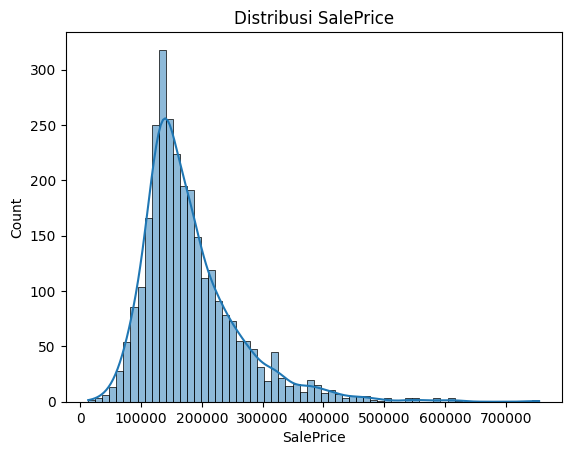

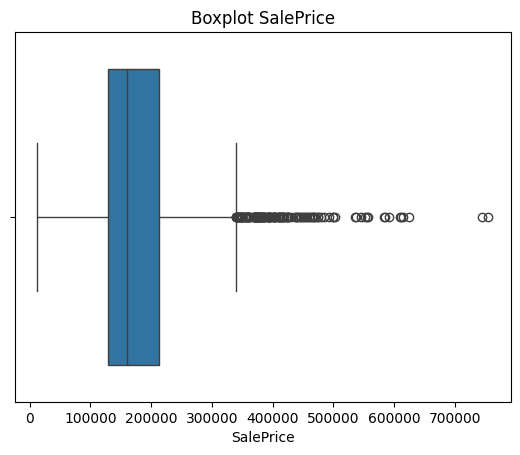

In [12]:
# Korelasi dengan SalePrice
corr = df_clean.corr(numeric_only=True)['SalePrice'].sort_values(ascending=False)
print("Top correlated features:\n", corr.head(10))
# Distribusi SalePrice
sns.histplot(df_clean['SalePrice'], kde=True)
plt.title("Distribusi SalePrice")
plt.show()
# Outlier detection
sns.boxplot(x=df_clean['SalePrice'])
plt.title("Boxplot SalePrice")
plt.show()

Mencari korelasi antara fitur-fitur dalam dataset dengan variabel target **SalePrice** (harga jual). Berikut penjelasan dari kode dan hasil yang ditampilkan:

1. **Kode Python**:

   * `df_clean.corr(numeric_only=True)['SalePrice']`: Menghitung korelasi antara **SalePrice** dan fitur numerik lainnya dalam dataset **df\_clean**.
   * `.sort_values(ascending=False)`: Mengurutkan hasil korelasi berdasarkan nilai korelasi yang paling tinggi (dari yang terbesar ke yang terkecil).
   * `print("Top correlated features:\n", corr.head(10))`: Menampilkan 10 fitur yang memiliki korelasi tertinggi dengan **SalePrice**.

2. **Hasil**:

   * `SalePrice` memiliki korelasi sempurna dengan dirinya sendiri, yaitu **1.000000**.
   * Fitur yang paling berkorelasi dengan **SalePrice** adalah **Overall Qual** (kualitas keseluruhan rumah) dengan korelasi **0.799262**.
   * Fitur lainnya seperti **TotalSF**, **Gr Liv Area**, dan **Garage Cars** memiliki korelasi yang cukup tinggi dengan **SalePrice**.

Jadi, ini adalah hasil yang menunjukkan fitur-fitur dalam dataset yang memiliki hubungan kuat dengan harga jual rumah berdasarkan nilai korelasi mereka.

Gambar Histogram menunjukkan hasil dari visualisasi distribusi data **SalePrice** menggunakan histogram dengan plot KDE (Kernel Density Estimate).
**Hasil**:

   * Histogram menunjukkan distribusi **SalePrice** pada dataset, dengan banyak nilai yang terkonsentrasi di sekitar harga **\$100,000 - \$200,000**.
   * Tampak ada sedikit ekor panjang (right-skewed), artinya sebagian besar rumah dijual dengan harga lebih rendah, namun ada beberapa rumah dengan harga sangat tinggi yang menyebabkan distribusi tidak simetris.

Secara keseluruhan, grafik ini memberikan gambaran tentang penyebaran harga jual rumah dalam dataset, yang mayoritas terdistribusi di kisaran harga menengah, tetapi ada beberapa rumah dengan harga sangat tinggi yang mengarah pada distribusi miring ke kanan.

Gambar menunjukkan **Boxplot** untuk mendeteksi outlier pada variabel **SalePrice** dalam dataset. Berikut adalah penjelasan terkait elemen-elemen dalam boxplot ini:

1. **Boxplot**:

   * **Kotak (box)**: Menunjukkan **interquartile range (IQR)**, yang mencakup 50% data di antara kuartil pertama (Q1) dan kuartil ketiga (Q3).
   * **Garis tengah di dalam kotak**: Menunjukkan **median** (nilai tengah) dari **SalePrice**.
   * **Whiskers** (garis horizontal di luar kotak): Menunjukkan rentang data yang berada dalam jangkauan yang tidak dianggap sebagai outlier, yaitu antara **Q1 - 1.5 \* IQR** dan **Q3 + 1.5 \* IQR**.
   * **Titik-titik di luar whiskers**: Ini adalah **outliers**, yang menunjukkan nilai-nilai **SalePrice** yang sangat jauh dari nilai pusat (median).

2. **Hasil boxplot**:

   * Ada banyak titik outlier yang terletak jauh di luar whiskers pada sisi kanan boxplot, menunjukkan bahwa ada beberapa rumah yang terjual dengan harga sangat tinggi dibandingkan dengan sebagian besar rumah lainnya.

### Kenapa Outlier Tidak Perlu Di-Handle:

1. **Kehadiran Outlier yang Sah**:

   * Outlier yang terdeteksi dalam boxplot bisa jadi mewakili nilai yang sah, seperti rumah mewah atau properti langka dengan harga sangat tinggi. Dalam hal ini, outlier ini memberi informasi yang penting tentang variasi harga dalam dataset.

2. **Konteks Masalah**:

   * Dalam kasus harga jual rumah (SalePrice), rumah dengan harga sangat tinggi mungkin merupakan kasus yang relevan untuk analisis dan tidak boleh dihapus, karena bisa jadi merepresentasikan bagian dari pasar yang ditargetkan oleh model prediksi harga.

3. **Model yang Robust**:

   * Beberapa model, seperti **tree-based models** (misalnya Random Forest, XGBoost), cenderung lebih robust terhadap outlier. Model-model ini tidak terlalu terpengaruh oleh nilai ekstrim dan masih dapat memberikan prediksi yang baik meskipun ada beberapa outlier.

4. **Pentingnya Variasi Data**:

   * Outlier sering kali memberikan wawasan yang lebih dalam tentang variabilitas dalam data. Menghapusnya bisa menghilangkan informasi penting yang dapat memperkaya model.

Secara keseluruhan, dalam konteks analisis harga jual rumah, outlier mungkin perlu dipertahankan karena memberikan informasi penting yang bisa mendukung model prediksi harga secara lebih akurat.



###Feature Engineering

In [13]:
from sklearn.preprocessing import LabelEncoder

# Label encoding untuk kolom dengan <= 10 kategori
label_cols = [col for col in df_clean.select_dtypes(include='object').columns if df_clean[col].nunique() <= 10]
for col in label_cols:
    le = LabelEncoder()
    df_clean[col] = le.fit_transform(df_clean[col])

# One-hot encoding untuk sisanya
df_model = pd.get_dummies(df_clean, drop_first=True)
from sklearn.preprocessing import StandardScaler

### 1. **Label Encoding (LabelEncoder) untuk Kategorikal ≤ 10 Kategori**

* Label Encoding mengubah nilai kategorikal menjadi angka (misalnya: `['Poor', 'Fair', 'Good']` -> `[0, 1, 2]`).
* Kita hanya lakukan untuk kolom dengan **jumlah kategori kecil (≤10)** karena:

  * Lebih efisien dan tidak menyebabkan **dimensionality explosion** seperti one-hot.
  * Banyak digunakan pada fitur ordinal (ada urutan nilai).

 Cocok untuk: fitur-fitur seperti `Exter Qual`, `Bsmt Qual`, `Garage Finish`, dll.

---

###  2. **One-Hot Encoding untuk Kategorikal Lainnya**

* One-hot encoding membuat kolom dummy: setiap kategori jadi 1 kolom (binary: 0/1).
* `drop_first=True`: drop satu kolom dummy agar tidak multikolinear (redundan).
* Dilakukan untuk semua kolom kategorikal lain yang tidak ditangani dengan LabelEncoder.

Cocok untuk: fitur non-ordinal seperti `Neighborhood`, `Exterior1st`, `HouseStyle`, dll.

###Model Machine Learning

In [14]:
# Pisahkan X dan y
X = df_model.drop(columns=['SalePrice'])
y = df_model['SalePrice']

# Split data (sebelum scaling)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standard Scaling (fit hanya pada training set, dan terapkan pada data test dengan transform)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Scaling setelah Split:

StandardScaler sekarang hanya diterapkan pada data training (X_train), kemudian data test (X_test) hanya di-transformasi menggunakan parameter scaler yang sama. Ini menghindari kebocoran data test ke data training.

Menghindari Kebocoran: Dengan melakukan scaling setelah pembagian data, kita memastikan bahwa data test tidak digunakan dalam proses pelatihan, menjaga validitas model.

In [15]:
# Cross-validation untuk mengevaluasi model
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Model 1: Linear Regression dengan Cross-validation
lr = LinearRegression()
cv_scores_lr = cross_val_score(lr, X_train_scaled, y_train, cv=cv, scoring='r2')
print("Linear Regression Cross-Validation R² Scores:", cv_scores_lr)
print("Mean R² for Linear Regression (CV):", np.mean(cv_scores_lr))

# Model 2: Random Forest dengan Cross-validation
rf = RandomForestRegressor(random_state=42)
cv_scores_rf = cross_val_score(rf, X_train_scaled, y_train, cv=cv, scoring='r2')
print("Random Forest Cross-Validation R² Scores:", cv_scores_rf)
print("Mean R² for Random Forest (CV):", np.mean(cv_scores_rf))

Linear Regression Cross-Validation R² Scores: [0.86556582 0.85494002 0.86904269 0.89627046 0.62917352]
Mean R² for Linear Regression (CV): 0.8229985017179441
Random Forest Cross-Validation R² Scores: [0.92150599 0.86568456 0.90562891 0.9225453  0.77704794]
Mean R² for Random Forest (CV): 0.8784825387018834


Di sini melakukan evaluasi performa dua model regresi (Linear Regression dan Random Forest Regressor) menggunakan **K-Fold Cross-Validation** sebanyak 5 kali lipat (folds). Skor yang digunakan adalah **R² (coefficient of determination)**.

####  **Linear Regression Cross-Validation R² Scores:**

```
[0.86556582 0.85494002 0.86904269 0.89627046 0.62917352]
```

Artinya:

* Model diuji sebanyak 5 kali (5-fold CV), dan setiap angka menunjukkan skor R² pada masing-masing fold.
* R² menunjukkan seberapa baik model menjelaskan variansi dari target (`y_train`). Nilai maksimal = 1 (fit sempurna), dan nilai negatif berarti performa lebih buruk dari model konstan.

Perhatikan bahwa skor fold ke-5 agak rendah (`0.6291`), menandakan model tidak konsisten bagus di semua subset data.

####  **Mean R² for Linear Regression (CV):**

```
0.8229985017179441
```

Rata-rata performa model Linear Regression dari ke-5 fold adalah **\~0.823**. Ini menandakan model cukup baik, menjelaskan sekitar 82% variansi data training secara rata-rata.

---

####  **Random Forest Cross-Validation R² Scores:**

```
[0.92150599 0.86568456 0.90562891 0.9225453  0.77704794]
```

* Hasilnya lebih tinggi dan lebih stabil dibanding Linear Regression.
* Fold ke-5 memang sedikit lebih rendah (`0.7770`), tapi masih lebih tinggi dari fold ke-5 Linear Regression.

####  **Mean R² for Random Forest (CV):**

```
0.8784825387018834
```

Rata-rata performa model Random Forest adalah **\~0.878**, artinya model menjelaskan sekitar 88% variansi target di data training.

---

###  **Kesimpulan:**

* **Random Forest** memiliki performa **lebih baik** dan **lebih konsisten** daripada **Linear Regression** pada dataset tersebut.
* Hal ini umum terjadi karena Random Forest bisa menangkap **hubungan non-linear dan interaksi antar fitur**, sedangkan Linear Regression hanya mampu menangkap hubungan **linear**.

Jika kamu ingin memilih model berdasarkan evaluasi ini, maka **Random Forest lebih direkomendasikan**.




Linear Regression - Training Metrics: MAE: 16412.94, MSE: 662940840.09, RMSE: 25747.64, R²: 0.89
Linear Regression - Testing Metrics: MAE: 18487.16, MSE: 969724624.42, RMSE: 31140.40, R²: 0.88
Random Forest - Training Metrics: MAE: 5916.28, MSE: 97789338.88, RMSE: 9888.85, R²: 0.98
Random Forest - Testing Metrics: MAE: 15326.13, MSE: 627842399.34, RMSE: 25056.78, R²: 0.92


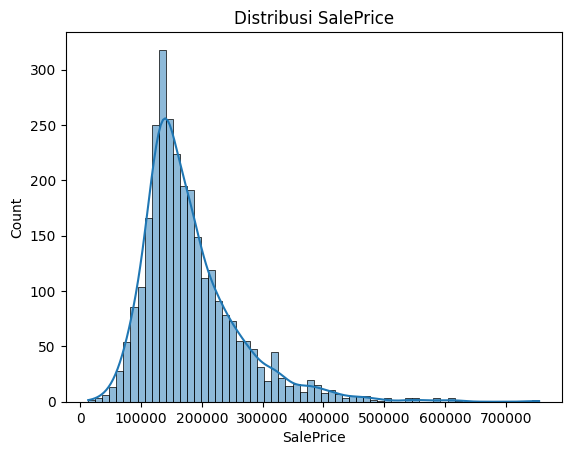

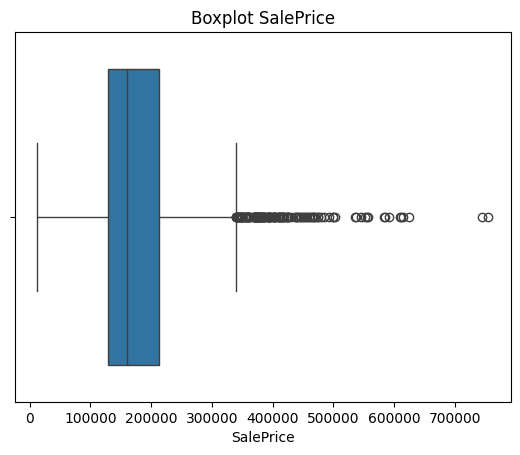

Model Performance Comparison


,Model,MAE Train,MSE Train,RMSE Train,R² Train,MAE Test,MSE Test,RMSE Test,R² Test
0,Linear Regression,16412.942832,6.629408e+08,25747.637563,0.888502,18487.164855,9.697246e+08,31140.401802,0.879050
1,Random Forest,5916.283225,9.778934e+07,9888.849219,0.983553,15326.131741,6.278424e+08,25056.783500,0.921691


Top 20 Features Importance from Random Forest:
 Overall Qual      0.474356
TotalSF           0.310329
2nd Flr SF        0.020351
HouseAge          0.016136
Gr Liv Area       0.012425
Lot Area          0.012320
Year Built        0.011992
Garage Area       0.009753
BsmtFin SF 1      0.009594
Bsmt Unf SF       0.008755
Year Remod/Add    0.007376
Bsmt Qual         0.006203
RemodAge          0.006135
Kitchen Qual      0.005728
Total Bsmt SF     0.005124
Garage Cars       0.004852
Lot Frontage      0.004494
Screen Porch      0.004405
1st Flr SF        0.003876
Open Porch SF     0.003669
dtype: float64


In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Train model after evaluating using cross-validation
lr.fit(X_train_scaled, y_train)
y_pred_train_lr = lr.predict(X_train_scaled)
y_pred_test_lr = lr.predict(X_test_scaled)

rf.fit(X_train_scaled, y_train)
y_pred_train_rf = rf.predict(X_train_scaled)
y_pred_test_rf = rf.predict(X_test_scaled)

# Function to calculate performance metrics
def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

# Calculate metrics for both models
metrics_lr_train = calculate_metrics(y_train, y_pred_train_lr)
metrics_lr_test = calculate_metrics(y_test, y_pred_test_lr)
metrics_rf_train = calculate_metrics(y_train, y_pred_train_rf)
metrics_rf_test = calculate_metrics(y_test, y_pred_test_rf)

# Print the performance metrics
print("Linear Regression - Training Metrics: MAE: {:.2f}, MSE: {:.2f}, RMSE: {:.2f}, R²: {:.2f}".format(*metrics_lr_train))
print("Linear Regression - Testing Metrics: MAE: {:.2f}, MSE: {:.2f}, RMSE: {:.2f}, R²: {:.2f}".format(*metrics_lr_test))
print("Random Forest - Training Metrics: MAE: {:.2f}, MSE: {:.2f}, RMSE: {:.2f}, R²: {:.2f}".format(*metrics_rf_train))
print("Random Forest - Testing Metrics: MAE: {:.2f}, MSE: {:.2f}, RMSE: {:.2f}, R²: {:.2f}".format(*metrics_rf_test))

# Plot distribution of target (SalePrice)
sns.histplot(y, kde=True)
plt.title("Distribusi SalePrice")
plt.show()

# Plot boxplot untuk mendeteksi outlier pada target
sns.boxplot(x=y)
plt.title("Boxplot SalePrice")
plt.show()

# Plot performance comparison between training and testing
metrics_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest'],
    'MAE Train': [metrics_lr_train[0], metrics_rf_train[0]],
    'MSE Train': [metrics_lr_train[1], metrics_rf_train[1]],
    'RMSE Train': [metrics_lr_train[2], metrics_rf_train[2]],
    'R² Train': [metrics_lr_train[3], metrics_rf_train[3]],
    'MAE Test': [metrics_lr_test[0], metrics_rf_test[0]],
    'MSE Test': [metrics_lr_test[1], metrics_rf_test[1]],
    'RMSE Test': [metrics_lr_test[2], metrics_rf_test[2]],
    'R² Test': [metrics_lr_test[3], metrics_rf_test[3]]
})

from IPython.display import display

print("Model Performance Comparison")
display(metrics_df)

# Feature importance from Random Forest model
feature_importance = pd.Series(rf.feature_importances_, index=X.columns)
top_features = feature_importance.sort_values(ascending=False).head(20)
print("Top 20 Features Importance from Random Forest:\n", top_features)


## **Gambar 1 – Histogram Distribusi SalePrice**

Gambar ini menunjukkan **distribusi harga rumah (SalePrice)** pada dataset.

* Distribusi **tidak simetris** dan **miring ke kanan (right-skewed)**.
* Mayoritas rumah memiliki harga antara **100.000 hingga 250.000**.
* Ada beberapa **outlier** di sisi kanan dengan harga yang sangat tinggi (hingga >600.000).
* Distribusi seperti ini **tidak normal**, yang bisa mempengaruhi model linear (seperti Linear Regression).

---

## **Gambar 2 – Boxplot SalePrice**

Boxplot ini menunjukkan persebaran nilai `SalePrice`, termasuk outlier.

* Kotak di tengah menunjukkan **interkuartil range (IQR)** – 50% data berada di dalamnya.
* Garis horizontal di tengah kotak = **median**.
* Banyak titik lingkaran di sebelah kanan = **outlier** (harga rumah sangat tinggi).
* Menegaskan bahwa distribusi harga rumah **skewed** dan terdapat **banyak outlier**.

---

## **Evaluasi Model: Training & Testing**

### 🔹 **Linear Regression**

* **Train R² = 0.89**, **Test R² = 0.88** → Model cukup baik tapi tidak sempurna, dan tidak overfitting.
* **MAE Train: \~16.4K**, **MAE Test: \~18.5K** → Rata-rata kesalahan prediksi sekitar 16–18 ribu dolar.
* **RMSE Test = 31K** → Kesalahan besar masih terjadi, karena model linear **tidak mampu menangkap pola kompleks** di data (misalnya non-linearitas).

###  **Random Forest**

* **Train R² = 0.98**, **Test R² = 0.92** → Model jauh lebih kuat, mampu menjelaskan 92% variansi data testing.
* **MAE Test turun ke \~15.3K** (lebih baik dari linear regression).
* **RMSE Test turun ke \~25K** → Model lebih akurat dan **lebih stabil** dalam menangani outlier & hubungan non-linear.
* **Tapi sedikit overfitting**, terlihat dari selisih R² Train & Test (\~0.06).

---

##  **Fitur Terpenting – Random Forest**

Top 5 fitur dengan kontribusi paling besar dalam memprediksi harga rumah:

1. **Overall Qual (0.474)** – Kualitas rumah secara keseluruhan.
2. **TotalSF (0.310)** – Total luas area rumah.
3. **2nd Flr SF (0.020)** – Luas lantai 2.
4. **HouseAge (0.016)** – Umur rumah.
5. **Gr Liv Area (0.012)** – Luas area tinggal di atas tanah.

 Kombinasi **kualitas dan ukuran rumah** sangat dominan dalam menentukan harga rumah, dan Random Forest berhasil menangkap hal ini.

---

##  **Kesimpulan Umum:**

| Model             | Akurasi     | Overfitting | Tangguh terhadap outlier |
| ----------------- | ----------- | ----------- | ------------------------ |
| Linear Regression | Baik        | Tidak       | Kurang                   |
| Random Forest     | Sangat Baik | Sedikit     | Kuat                     |

 **Saran**:

* Gunakan **Random Forest** untuk prediksi final.
* Pertimbangkan transformasi `SalePrice` (seperti log) jika tetap ingin memakai Linear Regression, karena distribusinya tidak normal.
* Outlier bisa dipertimbangkan untuk ditangani (dihapus/log-transform), terutama untuk model linear.


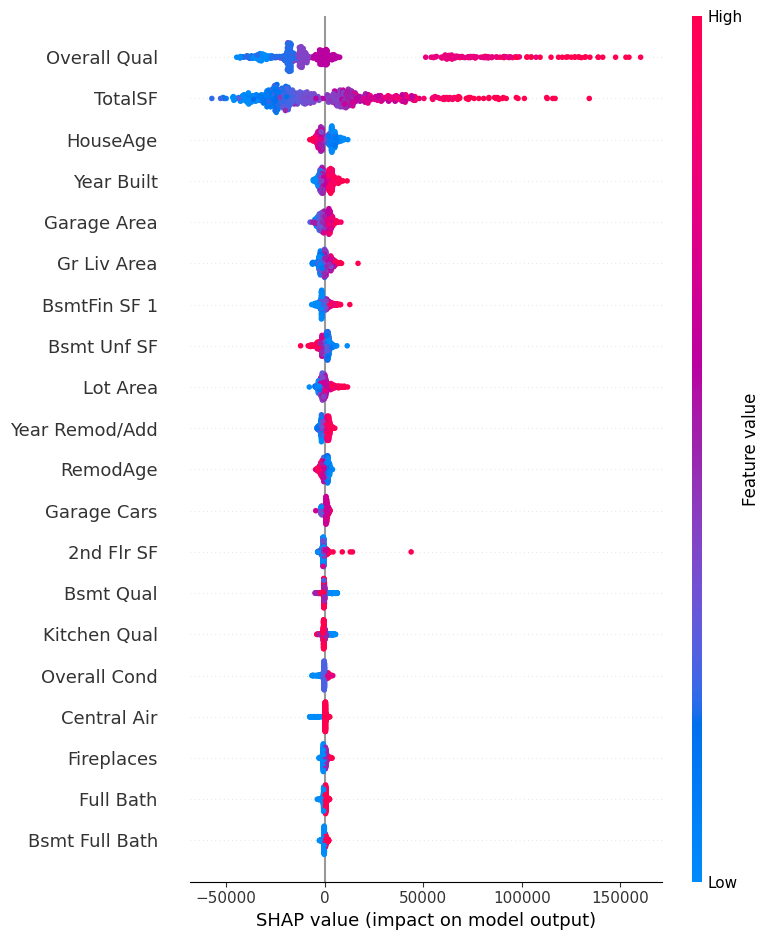

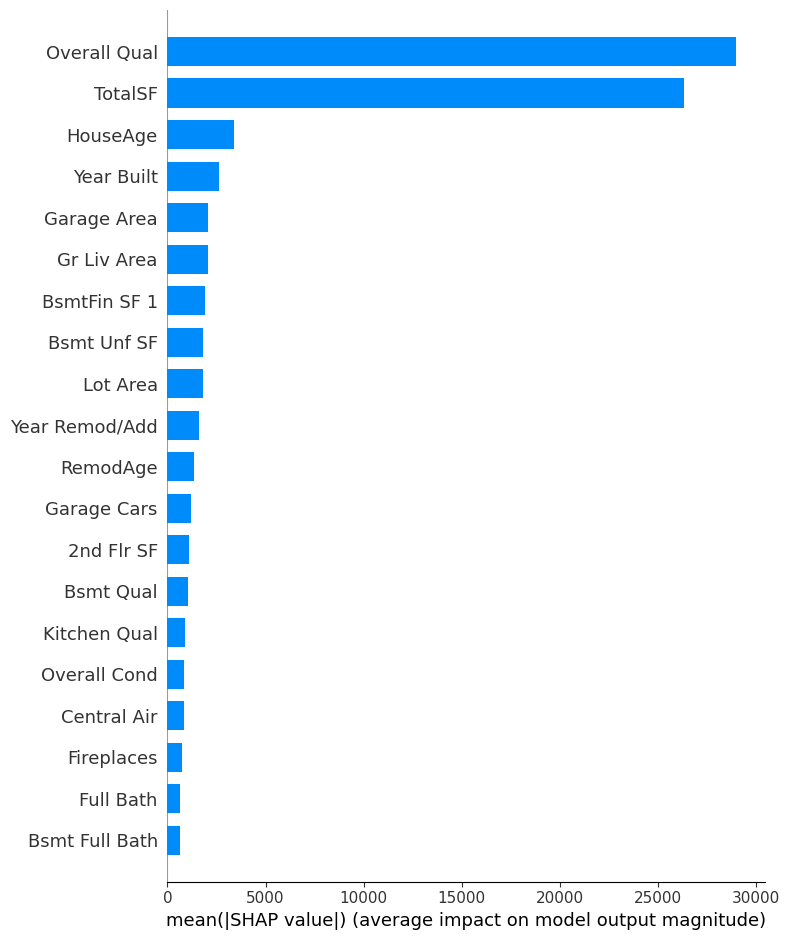

In [17]:
import shap
import pandas as pd

# Inisialisasi explainer untuk model Random Forest
explainer = shap.TreeExplainer(rf)

# Hitung SHAP values untuk data test
shap_values = explainer.shap_values(X_test_scaled)

# Ubah X_test_scaled kembali jadi DataFrame agar bisa digunakan oleh force_plot
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# 1. Global Feature Impact - Scatter plot (arah & kekuatan pengaruh fitur)
shap.summary_plot(shap_values, X_test_scaled_df)

# 2. Global Feature Importance - Bar plot (fitur paling berpengaruh)
shap.summary_plot(shap_values, X_test_scaled_df, plot_type="bar")

# 3. Force Plot - Visualisasi Prediksi Individual
shap.initjs()
sample_idx = 0  # atau pilih indeks lain
shap.force_plot(
    explainer.expected_value,
    shap_values[sample_idx],
    X_test_scaled_df.iloc[sample_idx]
)


### 🔹 **1. SHAP Summary Plot (Beeswarm Plot / Scatter Plot)**

#### Penjelasan:

* Grafik ini menunjukkan **pengaruh semua fitur** terhadap output model secara global.
* **Sumbu Y**: Nama fitur, diurutkan dari yang paling berpengaruh ke yang paling kecil.
* **Sumbu X**: Nilai SHAP (seberapa besar pengaruh fitur tersebut terhadap prediksi model).
* **Warna**: Nilai asli fitur (merah = tinggi, biru = rendah).

#### Interpretasi:

* Fitur **Overall Qual** dan **TotalSF** paling dominan mempengaruhi prediksi harga rumah.
* Nilai tinggi dari `Overall Qual` (warna merah) cenderung **menaikkan** prediksi harga (SHAP value positif).
* Sebaliknya, nilai rendah dari `TotalSF` (warna biru) cenderung **menurunkan** prediksi harga.
* Plot ini sangat berguna untuk memahami **arah dan kekuatan kontribusi fitur** terhadap prediksi model.

---

### 🔹 **2. SHAP Bar Plot (Mean |SHAP| Value)**

#### Penjelasan:

* Ini adalah ringkasan **rata-rata besar kontribusi fitur** tanpa memperhatikan arah (positif/negatif).
* Menampilkan **mean absolute SHAP value** dari setiap fitur.

#### Interpretasi:

* Fitur `Overall Qual` dan `TotalSF` adalah dua yang **paling penting** secara global karena memberikan kontribusi terbesar terhadap prediksi model, diikuti `HouseAge`, `Year Built`, dan `Garage Area`.
* Plot ini **lebih sederhana dan kuantitatif** dibanding summary plot, cocok untuk menunjukkan ranking pengaruh fitur secara keseluruhan.

---

### 🔹 **3. SHAP Force Plot (Prediksi Individual)**

#### Penjelasan:

* Visualisasi prediksi untuk satu observasi (misalnya rumah ke-0).
* Menampilkan bagaimana setiap fitur mendorong prediksi naik (merah) atau turun (biru) dari nilai dasar model (expected value).
* **Nilai tengah (base value)** adalah rata-rata prediksi model.
* **Nilai di tengah atas** (misalnya `173,475.50`) adalah hasil prediksi akhir untuk observasi ini.

#### Interpretasi:

* Fitur seperti `Overall Qual` mendorong harga **naik** (warna merah, nilai positif).
* Fitur seperti `TotalSF`, `Garage Area`, dan `Lot Area` mendorong harga **turun** (warna biru, nilai negatif).
* Force plot sangat berguna untuk **menjelaskan prediksi individual** secara intuitif.

---

###  Kesimpulan Gabungan:

* `Overall Qual` dan `TotalSF` adalah fitur paling penting baik secara global maupun lokal.
* Beeswarm plot → menunjukkan **arah dan sebaran pengaruh fitur**.
* Bar plot → menunjukkan **ranking pengaruh fitur** berdasarkan rata-rata absolut.
* Force plot → menjelaskan **prediksi spesifik untuk 1 rumah**, fitur mana yang menaikkan/menurunkan harganya.
